# Model Building

1. Train-test split

2. Multiple Linear Regression

3. Lasso Regression

4. Random Forest Regression

5. Gradient Boosting Regression

6. Bagging Regression

7. Tune models using GridsearchCV

8. Test Ensembles


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [11]:
df = pd.read_csv('jobs_keyword.csv')

In [12]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'company', 'job_title',
       'listing_id', 'address', 'employment_type', 'seniority', 'min_exp',
       'job_cat', 'salary_range', 'salary_unit', 'date_posted', 'date_expiry',
       'job_description', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len'],
      dtype='object')

Choosing relevant columns.

In [13]:
df_model = df[['job_title', 'employment_type', 'seniority', 'min_exp', 'job_cat', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len']]

In [14]:
df_model.head()

,job_title,employment_type,seniority,min_exp,job_cat,avg_salary,aws,python,sql,r,tableau,excel,powerbi,spark,hadoop,tensorflow,job_desc_len
0,analyst,full time,Junior Executive,2,information technology,6750.0,0,1,1,1,1,0,0,0,0,0,1626
1,analyst,full time,Senior Executive,6,information technology,7900.0,1,1,1,0,0,0,1,0,1,0,1175
2,analyst,full time,Senior Executive,2,others,5750.0,0,0,0,0,0,1,0,0,0,0,2590
3,analyst,full time,Senior Executive,3,information technology,7500.0,0,1,1,0,1,1,1,0,0,0,2416
4,analyst,full time,Manager,5,banking and finance,12000.0,0,1,1,1,1,0,1,0,0,0,1790


Converting categorical values to dummy variables

In [15]:
df_dum = pd.get_dummies(df_model)

In [16]:
df_dum.columns

Index(['min_exp', 'avg_salary', 'aws', 'python', 'sql', 'r', 'tableau',
       'excel', 'powerbi', 'spark', 'hadoop', 'tensorflow', 'job_desc_len',
       'job_title_analyst', 'job_title_consultant',
       'job_title_data management', 'job_title_data scientist',
       'job_title_developer', 'job_title_engineer', 'job_title_manager',
       'job_title_others', 'job_title_trainee', 'employment_type_contract',
       'employment_type_flexi-work', 'employment_type_full time',
       'employment_type_internship/traineeship', 'employment_type_temporary',
       'seniority_Executive', 'seniority_Fresh/entry level',
       'seniority_Junior Executive', 'seniority_Manager',
       'seniority_Middle Management', 'seniority_Non-executive',
       'seniority_Professional', 'seniority_Senior Executive',
       'seniority_Senior Management',
       'job_cat_accounting / auditing / taxation',
       'job_cat_admin / secretarial', 'job_cat_advertising / media',
       'job_cat_banking and finance', 

Splitting training and test data

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Running OLS to preview feature statistics

In [19]:
import statsmodels.api as sm

In [20]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     12.52
Date:                Sat, 29 May 2021   Prob (F-statistic):           2.21e-44
Time:                        20:40:15   Log-Likelihood:                -2550.4
No. Observations:                 294   AIC:                             5205.
Df Residuals:                     242   BIC:                             5396.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     2899.7465    400.764      7.236      0.000    2110.315    3689.178
min_exp                                    631.7870     61.705     10.239      0.000     510.240     753.334
aws                                        722.4221    346.754      2.083      0.038      39.381    1405.463
python                                     160.1511    248.775      0.644      0.520    -329.890     650.193
sql                                        -38.4930    255.193     -0.151      0.880    -541.176     464.190
r                                          193.7101    284.419      0.681      0.496    -366.543     753.963
tableau                                   -204.5274    241.263     -0.848      0.397    -679.770     270.715
excel                                     -849.0332    214.765     -3.953      0.000   -1272.080    -425.986
powerbi                                    313.5862    331.567      0.946      0.345    -339.539     966.711
spark                                      158.0389    459.491      0.344      0.731    -747.074    1063.152
hadoop                                     382.6001    464.757      0.823      0.411    -532.886    1298.086
tensorflow                                 544.9091    820.380      0.664      0.507   -1071.087    2160.906
job_desc_len                                 0.0944      0.092      1.026      0.306      -0.087       0.276
job_title_analyst                          225.7498    295.490      0.764      0.446    -356.311     807.811
job_title_consultant                      1749.3017    907.678      1.927      0.055     -38.657    3537.260
job_title_data management                  301.8156   1480.207      0.204      0.839   -2613.918    3217.549
job_title_data scientist                  2471.0621    547.514      4.513      0.000    1392.560    3549.564
job_title_developer                        178.6842    717.698      0.249      0.804   -1235.048    1592.416
job_title_engineer                        -185.7084    465.574     -0.399      0.690   -1102.803     731.386
job_title_manager                           -3.3797    828.212     -0.004      0.997   -1634.805    1628.045
job_title_others                         -1268.8534    610.080     -2.080      0.039   -2470.598     -67.109
job_title_trainee                         -568.9254   1080.092     -0.527      0.599   -2696.507    1558.656
employment_type_contract                  1266.9183    372.139      3.404      0.001     533.874    1999.963
employment_type_flexi-work                1718.8026    972.952      1.767      0.079    -197.733    3635.338
employment_type_full time                  526.4526    296.915      1.773      0.077     -58.415    1111.320
employment_type_internship/trai

Multiple Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-1159.278146486593

In [24]:
lm_l = Lasso(alpha=11.2)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-1095.7163802205225

Finding alpha value with lowest MAE

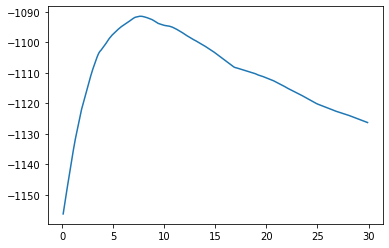

In [25]:
alpha = []
error = []

for i in range(1,300):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10), max_iter=5000)
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [26]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
76,7.7,-1091.45534


Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1169.67958725522

Using GridSearchCV to locate best parameters for Random Forest


In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs_rf = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_rf.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [29]:
print(gs_rf.best_score_)
print(gs_rf.best_estimator_)

-1134.0950960958871
RandomForestRegressor(criterion='mae', n_estimators=140)


Gradient Boosting Regression

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=0)
gb.fit(X_train, y_train)
np.mean(cross_val_score(gb,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-1166.01401083622

Using GridSearchCV to locate best parameters for Gradient Boosting

In [31]:

parameters = {'n_estimators':range(10,300,10), 'loss':('lad',), 'max_features':('auto','sqrt','log2')}

gs_gb = GridSearchCV(gb,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_gb.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'loss': ('lad',),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [32]:
print(gs_gb.best_score_)
print(gs_gb.best_estimator_)

-1141.5705282006263
GradientBoostingRegressor(loss='lad', max_features='sqrt', n_estimators=290,
                          random_state=0)


Bootstrap Aggregate Regression (Bagging)

In [33]:
from sklearn.ensemble import BaggingRegressor

bc = BaggingRegressor(n_estimators=10, random_state=0)
bc.fit(X_train, y_train)
np.mean(cross_val_score(bc,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-1164.9190197987666

Using GridSearchCV to locate best parameters for Bagging Classifier

In [34]:

parameters = {'n_estimators':range(10,300,10),  'bootstrap': [True, False], 'bootstrap_features': [True, False]}

gs_bc = GridSearchCV(bc,parameters,scoring='neg_mean_absolute_error',cv=3)
gs_bc.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=BaggingRegressor(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [35]:
print(gs_bc.best_score_)
print(gs_bc.best_estimator_)

-1121.3495540892536
BaggingRegressor(bootstrap_features=True, n_estimators=200, random_state=0)


Test Ensembles

Prediction from multiple linear regression

In [36]:
tpred_lm = lm.predict(X_test)
tpred_lm

array([ 5871.00778816, 10551.33280834,  2462.88200152,  4244.08090255,
        5493.43937435,   949.17951214,  6975.45274575,  8422.77845781,
        8260.76977733,  9269.4817946 ,  7818.02495382,  4756.43166619,
        5811.58451861,  5526.73403205,  4244.08090255,  4764.78217395,
        6635.2196365 ,  1693.91988168,  6654.70433052,  3521.23579179,
        5820.12593302,  4248.18330105,  2462.88200152,  5934.74822136,
        9473.54122733,  6474.37867189,  7841.56644552, 10288.09654851,
        6487.46339842,  8708.88363152,  7462.30060049,  4379.96555244,
        7442.49124842,  6169.54880123,  4841.26450306,  5214.97248337,
        4098.93587603,  2341.91597207,  7096.98407844,  6262.69721489,
        4759.21358371, 10254.38650285,  8648.42396105,  8536.39185928,
        9369.35208607,  7918.97951578,  5744.77561679,  4865.23184445,
        3576.62519216,  5351.72618315,  4379.96555244,  8648.42396105,
        7302.46578501,  6643.26339524,  6670.1242103 ,  6287.90720097,
      

Prediction from lasso regression

In [37]:
tpred_lml = lm_l.predict(X_test)
tpred_lml

array([ 6096.19595359, 11037.87114802,  2401.24303306,  4444.30843272,
        5691.9876792 ,  1384.05742968,  7115.16824629,  8933.83035827,
        7955.5692723 ,  8823.74251375,  7846.76595376,  4695.03412749,
        5498.85222316,  5508.27633192,  4444.30843272,  4289.69975344,
        6715.93550026,  4168.97580685,  7250.71619781,  3527.68624887,
        5698.95520737,  3789.68269526,  2401.24303306,  6024.76484537,
        8334.81076684,  6347.81949416,  7803.28665924,  9763.6374362 ,
        6116.00819081,  8717.85972762,  7082.21400084,  4330.39054254,
        6962.93595981,  6047.36965084,  4780.0529067 ,  5332.70853926,
        3538.64777531,  2421.019     ,  7192.34086112,  6091.81226965,
        5059.11186395, 10055.85761751,  8604.52662138,  8232.97369786,
        8891.18267064,  7617.60357287,  5339.61962192,  5071.86068584,
        3583.72507107,  5192.61579418,  4330.39054254,  8604.52662138,
        7368.03995902,  6642.02100783,  6745.08048141,  6071.8236162 ,
      

Prediction from Random Forest Regression (Tuned with Gridsearchcv)

In [38]:

tpred_rf = gs_rf.best_estimator_.predict(X_test)
tpred_rf

array([ 7262.5       , 11371.42857143,  2700.32142857,  5158.75      ,
        5785.        ,  2591.07142857,  7930.35714286, 10244.64285714,
        8023.21428571,  9803.03571429,  8080.35714286,  5331.78571429,
        5126.28571429,  4221.        ,  5158.75      ,  2993.92857143,
        7177.67857143,  5539.28571429,  6901.42857143,  3546.125     ,
        4825.        ,  3368.28571429,  2700.32142857,  6130.14285714,
        7479.28571429,  6808.21428571,  7928.39285714, 10959.46428571,
        6583.96428571,  8758.92857143,  5485.35714286,  4605.71428571,
        5648.75      ,  7849.46428571,  5522.67857143,  4231.60714286,
        4453.21428571,  2916.89285714,  7251.96428571,  5271.64285714,
        4758.96428571, 11110.71428571,  8472.32142857,  8735.89285714,
       10345.17857143,  6982.67857143,  4657.53571429,  4948.57142857,
        4272.625     ,  4542.85714286,  4605.71428571,  8472.32142857,
        7478.57142857,  7133.92857143,  7193.03571429,  5320.17857143,
      

Prediction from Gradient Boost Regression (Tuned with Gridsearchcv)

In [39]:
tpred_gb = gs_gb.best_estimator_.predict(X_test)
tpred_gb

array([ 6199.36073579, 10004.1126891 ,  2594.54266238,  7034.03803261,
        5997.92696929,  1849.7100774 ,  7976.38083756,  8028.25853621,
        7679.02391771,  8559.65321332,  7504.48795419,  5291.20943832,
        4590.98312752,  6078.22470472,  7034.03803261,  3880.75828483,
        6051.38308461,  3820.15780484,  6755.4558794 ,  3546.34555995,
        4807.61883321,  3137.70347767,  2594.54266238,  6526.66025936,
        8912.66473166,  5724.30454036,  7485.65276769,  9398.01439455,
        5802.11641927,  9296.63791262,  5819.42589629,  4616.72149341,
        5693.32395653,  5917.92476609,  5410.96070268,  5108.85135394,
        3396.94547693,  2393.50452945,  5911.51204877,  5857.1430757 ,
        6244.65912867,  9207.19770806,  7265.18656626,  7196.82112793,
        9400.47680606,  6804.57174978,  4635.21992875,  5049.25569941,
        4911.06809214,  4498.87363194,  4616.72149341,  7265.18656626,
        6480.45150554,  6792.05409428,  6530.42626256,  5557.32095582,
      

Prediction from Bagging Regression (Tuned with Gridsearchcv)

In [40]:
tpred_bc = gs_bc.best_estimator_.predict(X_test)
tpred_bc

array([ 6164.05178571,  9644.1875    ,  2568.64375   ,  6178.83988095,
        5805.66488095,  2699.32943272,  7641.36666667,  8381.13636364,
        8160.47142857,  9581.94166667,  7924.03571429,  5581.68630952,
        5504.08824786,  4550.78738095,  6178.83988095,  4194.63412698,
        6721.58422619,  5360.6719697 ,  6523.5       ,  3508.98511905,
        5007.72916667,  3366.98958333,  2568.64375   ,  6248.95      ,
        8089.7625    ,  5770.95625   ,  7397.75      , 10274.625     ,
        6453.77202381,  8518.41369048,  5613.35531136,  4906.36170635,
        6002.05833333,  8527.78869048,  5958.06130952,  4604.76160714,
        4283.3452381 ,  2997.16666667,  6981.05786505,  5551.94583333,
        5695.8875    ,  9812.08333333,  7960.72619048,  8317.11839896,
        9546.85416667,  6793.74970238,  5111.1455815 ,  4989.80718864,
        4456.96488095,  4695.08724817,  4906.36170635,  7960.72619048,
        7153.10416667,  6807.77083333,  6757.8672619 ,  5486.73958333,
      

Tabulating MAE

In [41]:
from sklearn.metrics import mean_absolute_error

results = {'Regression Model': ['Multiple linear regression', 'Lasso Regression', 'Random Forest', 'Gradiant Boosting', 'Boostrap Aggregate'], 'MAE': [mean_absolute_error(y_test,tpred_lm),mean_absolute_error(y_test,tpred_lml),mean_absolute_error(y_test,tpred_rf),mean_absolute_error(y_test,tpred_gb),mean_absolute_error(y_test,tpred_bc)]}
results_df = pd.DataFrame(results, columns=['Regression Model', 'MAE'])
print(results_df)

             Regression Model          MAE
0  Multiple linear regression  1450.715424
1            Lasso Regression  1395.916264
2               Random Forest  1403.736077
3           Gradiant Boosting  1345.158719
4          Boostrap Aggregate  1391.509327


Since Gradient Boosting Regression retuned the lowest MAE, we will use that for our final model.

In [44]:
import pickle
pickl = {'model': gs_gb.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )